# News Classifier
NLP and RandomForest

## Import the necessary libraries

In [ ]:
import pandas as pd
from random_forest_model import random_forest
from logistic_regression_XGB_model import main
from naive_bayes_model import main as naive_bayes_model
from sentiment_emotional_analysis import sentiment_emotional_analysis
from logistic_regression_embeddings import fake_news_detection_logistic_regression
from cnn_model import cnn_emotional_analysis

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matheusviana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load datasets

In [2]:
testing_path = './datasets/testing_data_lowercase_nolabels.csv'
training_path = './datasets/training_data_lowercase.csv'

In [3]:
df_testing = pd.read_csv(testing_path, sep='\t', header=None)
df_training = pd.read_csv(training_path, sep='\t', header=None)

## Random Forest Model

(6831, 5000)
Accuracy: 0.9136

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3515
           1       0.91      0.91      0.91      3316

    accuracy                           0.91      6831
   macro avg       0.91      0.91      0.91      6831
weighted avg       0.91      0.91      0.91      6831


Confusion Matrix:
[[3208  307]
 [ 283 3033]]


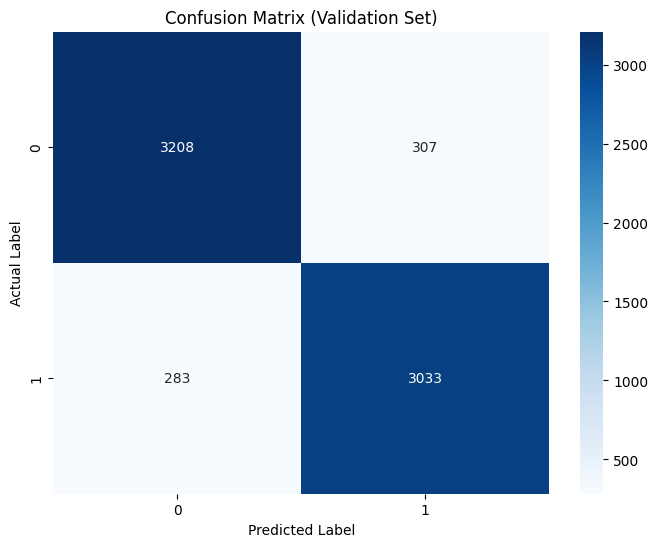


Submission file saved as './datasets/final_predictions_random_forest.csv'

Head of the submission file:
  id                                               text  label
0  2  copycat muslim terrorist arrested with assault...      0
1  2  wow! chicago protester caught on camera admits...      0
2  2   germany's fdp look to fill schaeuble's big shoes      1
3  2  mi school sends welcome back packet warning ki...      0
4  2  u.n. seeks 'massive' aid boost amid rohingya '...      1


In [4]:
random_forest(df_training, df_testing)

## Logistic Regression with XGB

--- Starting Fake News Detection Pipeline ---
Loading training data from: ./datasets/training_data_lowercase.csv


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matheusviana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading testing data from: ./datasets/testing_data_lowercase_nolabels.csv
Splitting training data into train/validation sets...
Applying features (Sentiment, Structure, etc.)...
Vectorizing text (BoW + TF-IDF)...
Combining text vectors with structural features...
Running GridSearchCV for Logistic Regression...
🧠 Best LogisticRegression params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

🚀 Training ENSEMBLE MODEL...


/opt/homebrew/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:21:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Final Ensemble *Validation* Accuracy: 0.9477

📊 *Validation* Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      3515
           1       0.94      0.96      0.95      3316

    accuracy                           0.95      6831
   macro avg       0.95      0.95      0.95      6831
weighted avg       0.95      0.95      0.95      6831



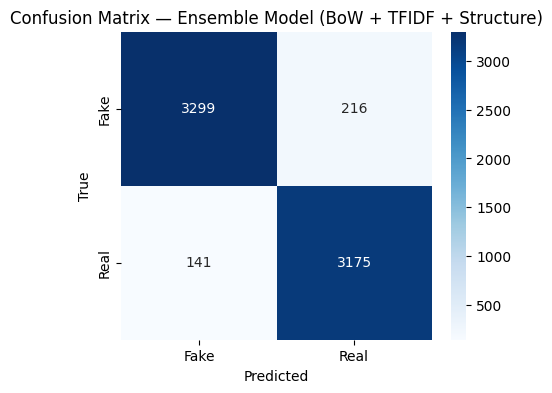


🚀 Generating final predictions on test data...
💾 Saving predictions to ./datasets/final_predictions_linear_regression_xgb.csv...
✅ Process complete.


{'validation_accuracy': 0.9477382520860782,
 'validation_report': '              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95      3515\n           1       0.94      0.96      0.95      3316\n\n    accuracy                           0.95      6831\n   macro avg       0.95      0.95      0.95      6831\nweighted avg       0.95      0.95      0.95      6831\n',
 'trained_model': VotingClassifier(estimators=[('lr', LogisticRegression(C=1, max_iter=1000)),
                              ('svm', LinearSVC(C=1)),
                              ('xgb',
                               XGBClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=0.8, device=None,
                                             early_sto

In [5]:
main(training_path, testing_path)

## Naive Bayes Model

In [6]:
naive_bayes_model(training_path, testing_path)

Iniciando o pipeline...
Carregando dados de treino de: ./datasets/training_data_lowercase.csv
Limpando texto de treino...
Limpeza de treino concluída.
------------------------------
Iniciando VALIDAÇÃO do modelo...
--- Métricas de Validação (Baseado em 20% dos dados de treino) ---
✅ Acurácia Naive Bayes: 0.9271

📋 Relatório de Classificação (Validação):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3515
           1       0.93      0.92      0.92      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831

------------------------------
Retreinando o modelo com 100% dos dados de treino para a previsão final...
✅ Modelo final treinado.
------------------------------
Carregando dados de teste (para previsão) de: ./datasets/testing_data_lowercase_nolabels.csv
Limpando texto de teste...
Vetorizando dados de teste (usando 

## Sentiment Emotional Analysis

✅ Training data loaded: 34152 samples

📊 Sentiment & Emotion Analysis (Fake vs Real):

       label  mean_sentiment  std_sentiment  mean_subjectivity  \
0  Fake News        0.008514       0.321317           0.350938   
1  Real News        0.027921       0.185140           0.174851   

   std_subjectivity  mean_emotional_words  total_emotional_words  
0          0.354021              0.055941                    983  
1          0.273044              0.014174                    235  


/Users/matheusviana/Documents/Projects/news-classifier-nlp/sentiment_emotional_analysis.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_stats, x="label", y="mean_sentiment", palette="coolwarm")


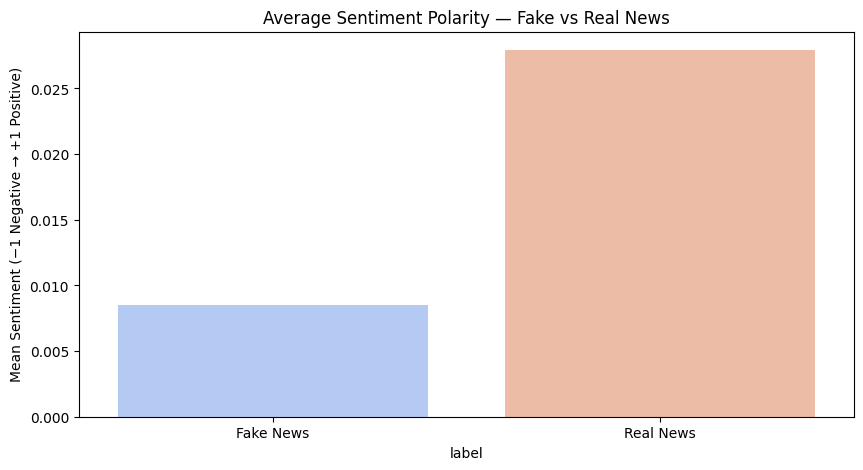

/Users/matheusviana/Documents/Projects/news-classifier-nlp/sentiment_emotional_analysis.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_stats, x="label", y="mean_subjectivity", palette="Purples")


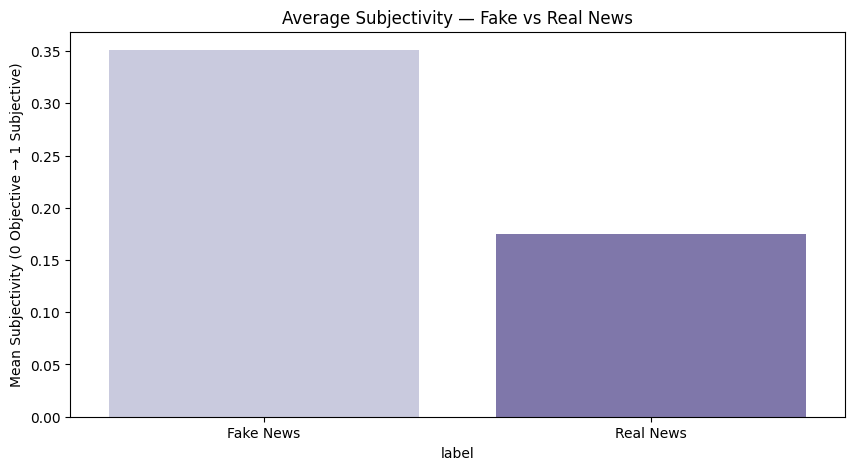

/Users/matheusviana/Documents/Projects/news-classifier-nlp/sentiment_emotional_analysis.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_stats, x="label", y="mean_emotional_words", palette="Greens")


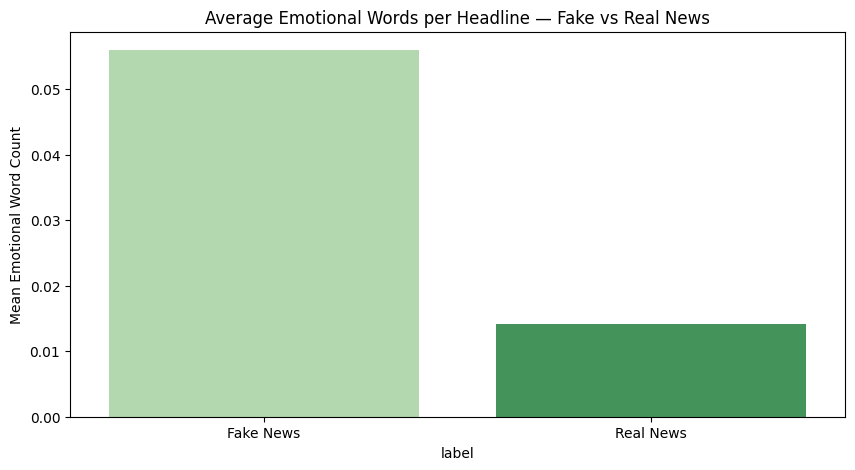

✅ Testing data loaded: 9984 samples

✅ Predictions saved to 'final_predictions_sentiment_emotional.csv'


,label,mean_sentiment,std_sentiment,mean_subjectivity,std_subjectivity,mean_emotional_words,total_emotional_words
0,Fake News,0.008514,0.321317,0.350938,0.354021,0.055941,983
1,Real News,0.027921,0.185140,0.174851,0.273044,0.014174,235


In [3]:
sentiment_emotional_analysis(training_path, testing_path)

## Logistic Regression + Embeddings

In [ ]:
fake_news_detection_logistic_regression(training_path, testing_path)

## CNN + Embeddings

In [ ]:
cnn_emotional_analysis(training_path, testing_path)